In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as ply
data = pd.read_csv('./Documents/energydata_complete.csv')
#Renaming Variables for better understanding
data.rename(columns={'T1':'Kitchen_Temp','RH_1':'Kitchen_Hum','T2':'LivingRoom_Temp','RH_2':'LivingRoom_Hum',
                   'T3':'LaundryRoom_Temp','RH_3':'LaundryRoom_Hum','T4':'OfficeRoom_Temp','RH_4':'OfficeRoom_Hum',
                   'T5':'BathRoom_Temp','RH_5':'BathRoom_Hum','T6':'OutsideNorth_Temp','RH_6':'OutsideNorth_Hum',
                   'T7':'IroningRoom_Temp','RH_7':'IroningRoom_Hum','T8':'TeenagerRoom_Temp','RH_8':'TeenagerRoom_Hum',
                   'T9':'ParentRoom_Temp','RH_9':'ParentRoom_Hum','T_out':'Outside_Temp','Press_mm_hg':'Pressure',
                   'RH_out':'Humidity'},inplace=True)
data['Energy_consumed'] = data['Appliances'] + data['lights']
data = data[['date','Appliances', 'lights', 'Energy_consumed', 'Kitchen_Temp', 'Kitchen_Hum',
       'LivingRoom_Temp', 'LivingRoom_Hum', 'LaundryRoom_Temp',
       'LaundryRoom_Hum', 'OfficeRoom_Temp', 'OfficeRoom_Hum', 'BathRoom_Temp',
       'BathRoom_Hum', 'OutsideNorth_Temp', 'OutsideNorth_Hum',
       'IroningRoom_Temp', 'IroningRoom_Hum', 'TeenagerRoom_Temp',
       'TeenagerRoom_Hum', 'ParentRoom_Temp', 'ParentRoom_Hum', 'Outside_Temp',
       'Pressure', 'Humidity', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2'
       ]]
numeric_data = data.select_dtypes(include = ['float64', 'int64'])

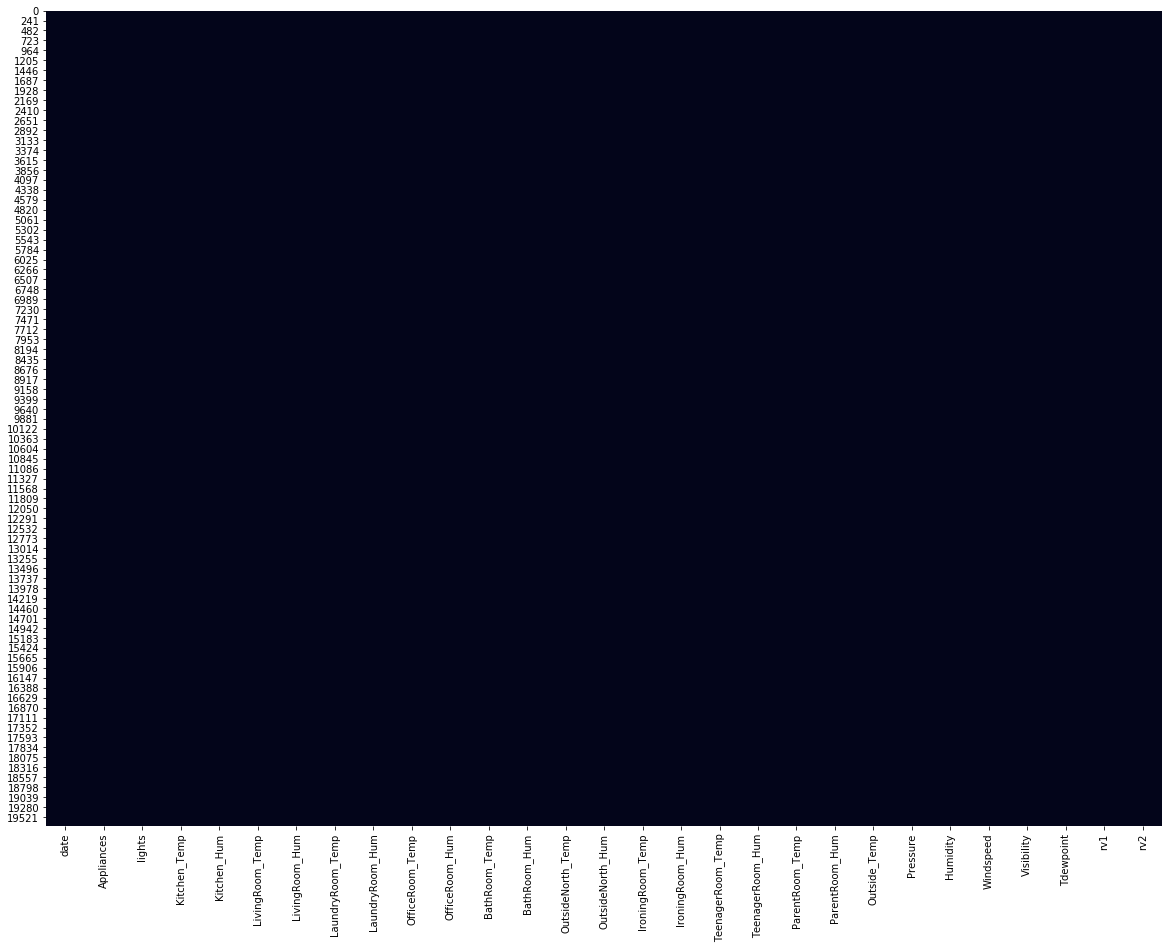

In [7]:
#Checking for any null values within the Dataset
plt.subplots(figsize=(20,15))
sns.heatmap(data.isnull(), cbar = False)

In [16]:

data

,date,Appliances,lights,Energy_consumed,Kitchen_Temp,Kitchen_Hum,LivingRoom_Temp,LivingRoom_Hum,LaundryRoom_Temp,LaundryRoom_Hum,...,ParentRoom_Temp,ParentRoom_Hum,Outside_Temp,Pressure,Humidity,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,90,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,...,17.033333,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,90,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,...,17.066667,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,80,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,...,17.000000,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,90,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,...,17.000000,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,100,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,...,17.000000,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,90,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,...,17.000000,45.290000,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,110,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,...,17.000000,45.290000,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,110,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,...,17.000000,45.290000,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,100,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,...,17.000000,45.290000,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,110,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,...,17.000000,45.290000,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


In [17]:
data.describe()

,Appliances,lights,Energy_consumed,Kitchen_Temp,Kitchen_Hum,LivingRoom_Temp,LivingRoom_Hum,LaundryRoom_Temp,LaundryRoom_Hum,OfficeRoom_Temp,...,ParentRoom_Temp,ParentRoom_Hum,Outside_Temp,Pressure,Humidity,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,101.496833,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,104.380829,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,10.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,50.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,60.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,100.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,1110.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


count    19735.000000
mean       101.496833
std        104.380829
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1110.000000
Name: Energy_consumed, dtype: float64


C:\Users\rishi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



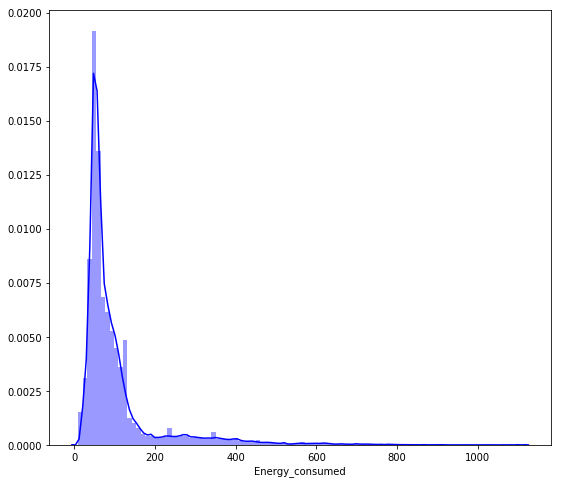

In [18]:
print(data['Energy_consumed'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data['Energy_consumed'], color='b', bins=100)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 30 columns):
date                 19735 non-null object
Appliances           19735 non-null int64
lights               19735 non-null int64
Energy_consumed      19735 non-null int64
Kitchen_Temp         19735 non-null float64
Kitchen_Hum          19735 non-null float64
LivingRoom_Temp      19735 non-null float64
LivingRoom_Hum       19735 non-null float64
LaundryRoom_Temp     19735 non-null float64
LaundryRoom_Hum      19735 non-null float64
OfficeRoom_Temp      19735 non-null float64
OfficeRoom_Hum       19735 non-null float64
BathRoom_Temp        19735 non-null float64
BathRoom_Hum         19735 non-null float64
OutsideNorth_Temp    19735 non-null float64
OutsideNorth_Hum     19735 non-null float64
IroningRoom_Temp     19735 non-null float64
IroningRoom_Hum      19735 non-null float64
TeenagerRoom_Temp    19735 non-null float64
TeenagerRoom_Hum     19735 non-null float64
ParentRoom_Temp   

In [3]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
Appliances           19735 non-null int64
lights               19735 non-null int64
Kitchen_Temp         19735 non-null float64
Kitchen_Hum          19735 non-null float64
LivingRoom_Temp      19735 non-null float64
LivingRoom_Hum       19735 non-null float64
LaundryRoom_Temp     19735 non-null float64
LaundryRoom_Hum      19735 non-null float64
OfficeRoom_Temp      19735 non-null float64
OfficeRoom_Hum       19735 non-null float64
BathRoom_Temp        19735 non-null float64
BathRoom_Hum         19735 non-null float64
OutsideNorth_Temp    19735 non-null float64
OutsideNorth_Hum     19735 non-null float64
IroningRoom_Temp     19735 non-null float64
IroningRoom_Hum      19735 non-null float64
TeenagerRoom_Temp    19735 non-null float64
TeenagerRoom_Hum     19735 non-null float64
ParentRoom_Temp      19735 non-null float64
ParentRoom_Hum       19735 non-null float64
Outside_Temp   

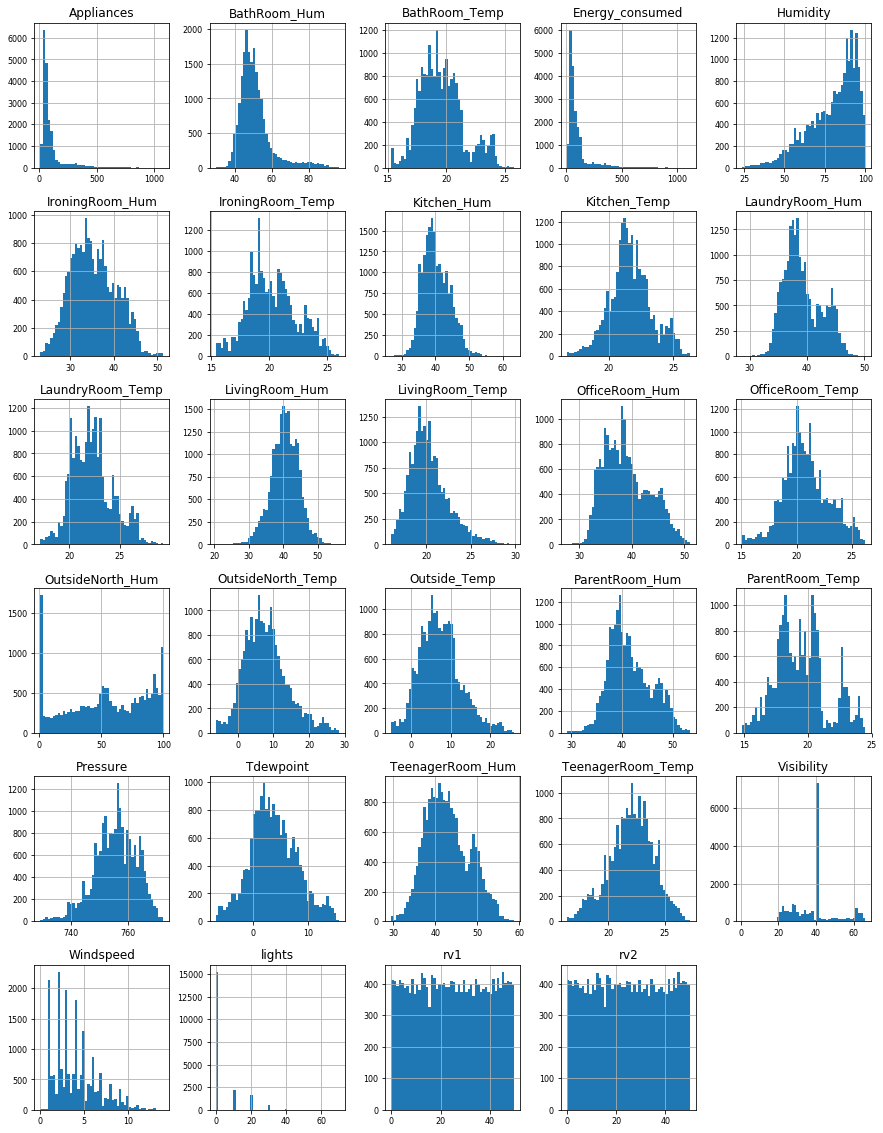

In [25]:
# Plotting histogram of numerical features
numeric_data.hist(figsize=(15, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [ ]:
# Scatterplot of all numeric data for vs. Energy_consumed
for i in range(0, len(numeric_data.columns), 5):
    sns.pairplot(data=numeric_data,
                x_vars=numeric_data.columns[i:i+5],
                y_vars=numeric_data['Energy_consumed'])

In [6]:
data['date']=pd.to_datetime(data['date'])

In [7]:
data.head()

,date,Appliances,lights,Energy_consumed,Kitchen_Temp,Kitchen_Hum,LivingRoom_Temp,LivingRoom_Hum,LaundryRoom_Temp,LaundryRoom_Hum,...,Visibility,Tdewpoint,rv1,rv2,Day_of_week,Month_Number,Time,Date_number,Weekday_number,Weekday_Column
0,2016-01-11 17:00:00,60,30,90,19.89,47.596667,19.2,44.790000,19.79,44.730000,...,63.000000,5.3,13.275433,13.275433,Monday,1,17:00:00,2016-01-11,0,0
1,2016-01-11 17:10:00,60,30,90,19.89,46.693333,19.2,44.722500,19.79,44.790000,...,59.166667,5.2,18.606195,18.606195,Monday,1,17:10:00,2016-01-11,0,0
2,2016-01-11 17:20:00,50,30,80,19.89,46.300000,19.2,44.626667,19.79,44.933333,...,55.333333,5.1,28.642668,28.642668,Monday,1,17:20:00,2016-01-11,0,0
3,2016-01-11 17:30:00,50,40,90,19.89,46.066667,19.2,44.590000,19.79,45.000000,...,51.500000,5.0,45.410389,45.410389,Monday,1,17:30:00,2016-01-11,0,0
4,2016-01-11 17:40:00,60,40,100,19.89,46.333333,19.2,44.530000,19.79,45.000000,...,47.666667,4.9,10.084097,10.084097,Monday,1,17:40:00,2016-01-11,0,0


In [4]:
# Converting Date object to Datetime object
data['date']=pd.to_datetime(data['date'])

# Adding day of week column
data['Day_of_week']=data['date'].dt.weekday_name

# Adding month number column
data['Month_Number']=data['date'].dt.month

# Adding Time column
data['Time']=data['date'].dt.time

# Adding month number column
data['Date_number']=data['date'].dt.date

# Geting the weekday number
data["Weekday_number"]=data['date'].dt.weekday

#Adding Weekday column
if str(data.Day_of_week)=="Sunday" or str(data.Day_of_week)=="Saturday":
    data["Weekday_Column"]=1
else:
    data["Weekday_Column"]=0

In [5]:
data.head()


,date,Appliances,lights,Energy_consumed,Kitchen_Temp,Kitchen_Hum,LivingRoom_Temp,LivingRoom_Hum,LaundryRoom_Temp,LaundryRoom_Hum,...,Visibility,Tdewpoint,rv1,rv2,Day_of_week,Month_Number,Time,Date_number,Weekday_number,Weekday_Column
0,2016-01-11 17:00:00,60,30,90,19.89,47.596667,19.2,44.790000,19.79,44.730000,...,63.000000,5.3,13.275433,13.275433,Monday,1,17:00:00,2016-01-11,0,0
1,2016-01-11 17:10:00,60,30,90,19.89,46.693333,19.2,44.722500,19.79,44.790000,...,59.166667,5.2,18.606195,18.606195,Monday,1,17:10:00,2016-01-11,0,0
2,2016-01-11 17:20:00,50,30,80,19.89,46.300000,19.2,44.626667,19.79,44.933333,...,55.333333,5.1,28.642668,28.642668,Monday,1,17:20:00,2016-01-11,0,0
3,2016-01-11 17:30:00,50,40,90,19.89,46.066667,19.2,44.590000,19.79,45.000000,...,51.500000,5.0,45.410389,45.410389,Monday,1,17:30:00,2016-01-11,0,0
4,2016-01-11 17:40:00,60,40,100,19.89,46.333333,19.2,44.530000,19.79,45.000000,...,47.666667,4.9,10.084097,10.084097,Monday,1,17:40:00,2016-01-11,0,0
